In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
'''数据预处理和数据增强'''
from torchvision import transforms
from d2l import torch as d2l

'''方便显示'''
d2l.use_svg_display()

In [6]:
'''读取数据集'''
trans = transforms.ToTensor() # 定义最近简单的预处理，将PIL转换成[0,1]之间的张量
'''下载数据集'''
mnist_train = torchvision.datasets.FashionMNIST(root = "./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root = "./data", train=False, transform=trans, download=True)


100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [7]:
'''十个类别，每个类别：train: 6000, test: 1000'''
len(mnist_train), len(mnist_test)

(60000, 10000)

In [8]:
'''1通道，h=28，w=28 pixel'''
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [10]:
'''数据集包含十个种类，
t-shirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankle, boot'''
def get_fashion_mnist_labels(labels):
    """返回标签，即将数据index转换成text

    Args:
        labels (_type_): _description_
    """
    text_labels = ['t-shirt', 't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle', 'boot']
    return [text_labels[int(i)] for i in labels]

In [11]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

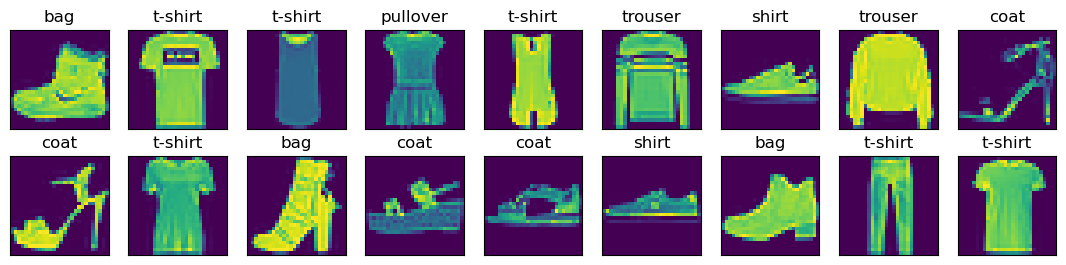

In [14]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [15]:
"""
读取小批量
"""
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [16]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'3.66 sec'

In [20]:
'''整合所有组件'''
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [22]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
